In [1]:
import json
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from collections import Counter
import collections
%matplotlib inline

In [3]:
# majority matrix absolute, new dataset
annotations_new = []
majority_matrix = {'0.6':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3':[0,0,0,0]}

with open("truth_verification.jsonl", "r") as inf:
    annotations_new = [json.loads(x) for x in inf.readlines()]

for a in annotations_new:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])[:3]][(most_common[0][1])-2] += 1
    else:
        majority_matrix[str(most_common[1][0])[:3]][(most_common[1][1])-2] += 1

print("     |   2\t  3\t  4\t  5")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3'][0]) + "\t" + str(majority_matrix['0.3'][1])+ "\t" + str(majority_matrix['0.3'][2])+ "\t" + str(majority_matrix['0.3'][3]))
print("0.6  | " + str(majority_matrix['0.6'][0]) + "\t" + str(majority_matrix['0.6'][1])+ "\t" + str(majority_matrix['0.6'][2])+ "\t" + str(majority_matrix['0.6'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5
--------------------------------------------
0.0  | 1196	1438	679	306
0.3  | 2838	2882	800	119
0.6  | 3029	3055	1044	146
1.0  | 1247	977	204	20


In [4]:
# majority matrix absolute, old dataset
annotations_old = []
majority_matrix = {'0.6':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3':[0,0,0,0]}

with open("clickbait17-train-170331/truth.jsonl", "r") as inf:
    annotations_old = [json.loads(x) for x in inf.readlines()]

for a in annotations_old:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])[:3]][max(most_common[0][1], 5)-2] += 1
    else:
        majority_matrix[str(most_common[1][0])[:3]][max(most_common[1][1], 5)-2] += 1

print("     |   2\t  3\t  4\t  5+")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3'][0]) + "\t" + str(majority_matrix['0.3'][1])+ "\t" + str(majority_matrix['0.3'][2])+ "\t" + str(majority_matrix['0.3'][3]))
print("0.6  | " + str(majority_matrix['0.6'][0]) + "\t" + str(majority_matrix['0.6'][1])+ "\t" + str(majority_matrix['0.6'][2])+ "\t" + str(majority_matrix['0.6'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5+
--------------------------------------------
0.0  | 0	0	0	1259
0.3  | 0	0	0	438
0.6  | 0	0	0	417
1.0  | 0	0	0	345


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


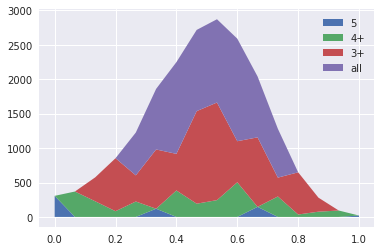

In [5]:
# plot mean new dataset
y_major = [{},{},{},{}]
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations_new:
    mean = str(round(a['truthMean'], 5))[:6]
    most_common = Counter(a['truthJudgments']).most_common(1)
    for di in y_major:
        try:
            di[mean] = di[mean]
        except KeyError:
            di[mean] = 0
    
    y_major[0][mean] += 1
    if most_common[0][1] > 2:
        y_major[1][mean] += 1
    if most_common[0][1] > 3:
        y_major[2][mean] += 1
    if most_common[0][1] > 4:
        y_major[3][mean] += 1


ordered_all = collections.OrderedDict(sorted(y_major[0].items()))  
ordered_3 = collections.OrderedDict(sorted(y_major[1].items()))
ordered_4 = collections.OrderedDict(sorted(y_major[2].items()))
ordered_5 = collections.OrderedDict(sorted(y_major[3].items()))


# Area chart
plt.fill_between([float(x) for x in ordered_5.keys()], 0, list(ordered_5.values()), label="5")
plt.fill_between([float(x) for x in ordered_4.keys()], list(ordered_5.values()), list(ordered_4.values()), label="4+")
plt.fill_between([float(x) for x in ordered_3.keys()], list(ordered_4.values()), list(ordered_3.values()), label="3+")
plt.fill_between([float(x) for x in ordered_all.keys()], list(ordered_3.values()), list(ordered_all.values()), label="all")

''' Line graph
plt.plot([float(x) for x in ordered_5.keys()], list(ordered_5.values()), label="5")
plt.plot([float(x) for x in ordered_4.keys()], list(ordered_4.values()), label="4+")
plt.plot([float(x) for x in ordered_3.keys()], list(ordered_3.values()), label="3+")
plt.plot([float(x) for x in ordered_all.keys()], list(ordered_all.values()), label="all")
'''

plt.legend()

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


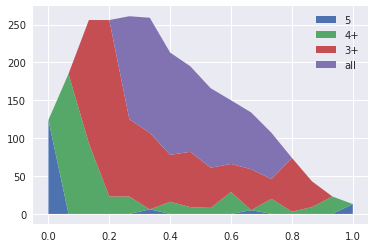

In [6]:
# plot mean old dataset
y_major = [{},{},{},{}]
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations_old:
    mean = str(round(a['truthMean'], 5))[:5]
    most_common = Counter(a['truthJudgments']).most_common(1)
    for di in y_major:
        try:
            di[mean] = di[mean]
        except KeyError:
            di[mean] = 0
    
    y_major[0][mean] += 1
    if most_common[0][1] > 2:
        y_major[1][mean] += 1
    if most_common[0][1] > 3:
        y_major[2][mean] += 1
    if most_common[0][1] > 4:
        y_major[3][mean] += 1


ordered_all = collections.OrderedDict(sorted(y_major[0].items()))  
ordered_3 = collections.OrderedDict(sorted(y_major[1].items()))
ordered_4 = collections.OrderedDict(sorted(y_major[2].items()))
ordered_5 = collections.OrderedDict(sorted(y_major[3].items()))


# Area chart
plt.fill_between([float(x) for x in ordered_5.keys()], 0, list(ordered_5.values()), label="5")
plt.fill_between([float(x) for x in ordered_4.keys()], list(ordered_5.values()), list(ordered_4.values()), label="4+")
plt.fill_between([float(x) for x in ordered_3.keys()], list(ordered_4.values()), list(ordered_3.values()), label="3+")
plt.fill_between([float(x) for x in ordered_all.keys()], list(ordered_3.values()), list(ordered_all.values()), label="all")

''' Line graph
plt.plot([float(x) for x in ordered_5.keys()], list(ordered_5.values()), label="5")
plt.plot([float(x) for x in ordered_4.keys()], list(ordered_4.values()), label="4+")
plt.plot([float(x) for x in ordered_3.keys()], list(ordered_3.values()), label="3+")
plt.plot([float(x) for x in ordered_all.keys()], list(ordered_all.values()), label="all")
'''

plt.legend()

56
OrderedDict([('[0.0, 0.0, 0.0, 0.0, 0.0]', 306), ('[0.3333333333, 0.0, 0.0, 0.0, 0.0]', 369), ('[0.3333333333, 0.3333333333, 0.0, 0.0, 0.0]', 348), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.0, 0.0]', 287), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333, 0.0]', 224), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333]', 119), ('[0.6666666666, 0.0, 0.0, 0.0, 0.0]', 227), ('[0.6666666666, 0.3333333333, 0.0, 0.0, 0.0]', 483), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.0, 0.0]', 622), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333, 0.0]', 694), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333]', 384), ('[0.6666666666, 0.6666666666, 0.0, 0.0, 0.0]', 189), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.0, 0.0]', 562), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.3333333333, 0.0]', 845), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333]', 698), ('[0.6666666666, 0.6666666666, 0.6666666666, 0.0

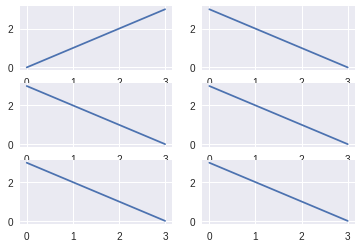

In [57]:
# majority classes new dataset
anno_new_perm = {}

# want: each permutation of judgments: put nr. occurance in matrix, maybe heatmap

for a in annotations_new:
    try:
        anno_new_perm[str(sorted(a['truthJudgments'], reverse=True))] += 1
    except KeyError:
        anno_new_perm[str(sorted(a['truthJudgments'], reverse=True))] = 1

#print(len(anno_new_perm.keys()))
#print(collections.OrderedDict(sorted(anno_new_perm.items())))

fig = plt.figure(1)
ax1 = fig.add_subplot(321)
ax1.plot([0,1,2,3])

ax2 = fig.add_subplot(322)
ax2.plot([3,2,1,0])

ax3 = fig.add_subplot(323)
ax3.plot([3,2,1,0])

ax4 = fig.add_subplot(324)
ax4.plot([3,2,1,0])

ax5 = fig.add_subplot(325)
ax5.plot([3,2,1,0])

ax6 = fig.add_subplot(326)
ax6.plot([3,2,1,0])

# find typical classes (plot): triangles of how majorities split, scatterplot